# Explonatory Data Analysis

After I have scrapped data for almost 5k movies, it is time to examine it, particually focusing on synopses.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from pathlib import Path
PATH_TO_DATA = Path("../data")

First, let's load the data file I created during scrapping and look at it's content.

In [7]:
data = pd.read_csv(PATH_TO_DATA / "kinopoisk.csv")
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4786 entries, 0 to 4785
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4786 non-null   int64  
 1   title_ru         4786 non-null   object 
 2   title_orig       4680 non-null   object 
 3   duration         4754 non-null   object 
 4   slogan           4786 non-null   object 
 5   year             4786 non-null   float64
 6   country          4786 non-null   object 
 7   director         4786 non-null   object 
 8   cast             4786 non-null   object 
 9   script           4778 non-null   object 
 10  producer         4785 non-null   object 
 11  operator         4777 non-null   object 
 12  composer         4638 non-null   object 
 13  artist           4749 non-null   object 
 14  montage          4737 non-null   object 
 15  genre            4786 non-null   object 
 16  budget           4039 non-null   object 
 17  cash_USA      

,id,title_ru,title_orig,duration,slogan,year,country,director,cast,script,...,montage,genre,budget,cash_USA,cash_total,cash_russia,kinopoisk_score,imdb_score,critics_score,synopsis
0,326,Побег из Шоушенка,The Shawshank Redemption,02:16:48,«Страх - это кандалы. Надежда - это свобода»,1994.0,США,Фрэнк Дарабонт,"Тим Роббинс, Морган Фриман, Боб Гантон, Уильям...","Фрэнк Дарабонт, Стивен Кинг",...,Ричард Фрэнсис-Брюс,драма,$25 000 000,$28 341 469,"+ $77 218 = $28 418 687, сборы",$87 432,9.111,9.3,90%,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
1,435,Зеленая миля,The Green Mile,03:08:45,«Пол Эджкомб не верил в чудеса. Пока не столкн...,1999.0,США,Фрэнк Дарабонт,"Том Хэнкс, Дэвид Морс, Бонни Хант, Майкл Кларк...","Фрэнк Дарабонт, Стивен Кинг",...,Ричард Фрэнсис-Брюс,"фантастика, драма, криминал, детектив",$60 000 000,$136 801 374,"+ $150 000 000 = $286 801 374, сборы",NaN,9.062,8.6,78%,Пол Эджкомб — начальник блока смертников в тюр...
2,448,Форрест Гамп,Forrest Gump,02:22:09,"«Мир уже никогда не будет прежним, после того ...",1994.0,США,Роберт Земекис,"Том Хэнкс, Робин Райт, Салли Филд, Гэри Синиз,...","Эрик Рот, Уинстон Грум",...,Артур Шмидт,"драма, мелодрама, комедия, история, военный",$55 000 000,$329 694 499,"+ $347 693 217 = $677 387 716, сборы",$84 460,8.913,8.8,70%,"От лица главного героя Форреста Гампа, слабоум..."
3,329,Список Шиндлера,Schindler's List,03:15:23,«Этот список - жизнь»,1993.0,США,Стивен Спилберг,"Лиам Нисон, Бен Кингсли, Рэйф Файнс, Кэролайн ...","Стивен Зеллиан, Томас Кенилли",...,Майкл Кан,"драма, биография, история, военный",$22 000 000,$96 065 768,"+ $225 240 537 = $321 306 305, сборы",NaN,8.818,8.9,97%,Фильм рассказывает реальную историю загадочног...
4,447301,Начало,Inception,02:28:06,«Твой разум - место преступления»,2010.0,"США, Великобритания",Кристофер Нолан,"Леонардо ДиКаприо, Джозеф Гордон-Левитт, Эллен...",Кристофер Нолан,...,Ли Смит,"фантастика, боевик, триллер, драма, детектив",$160 000 000,$292 576 195,"+ $535 745 837 = $828 322 032, сборы",$21 760 177,8.662,8.8,87%,"Кобб — талантливый вор, лучший из лучших в опа..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781,771753,Черная роза,NaN,01:41,«Он - русский неудержимый»,2014.0,"США, Россия",Александр Невский,"Александр Невский, Кристанна Локен, Эдриан Пол...","Брент Хафф, Джордж Саундерс",...,Стивен Адриансон,"детектив, триллер, криминал",NaN,NaN,сборы,"$887 615, сборы",1.433,2.5,22%,Майор московской полиции отправляется в Лос-Ан...
4782,276129,Цветок дьявола,NaN,02:25,«Искушение неизбежно»,2010.0,Россия,Екатерина Гроховская,"Ольга Хохлова, Сергей Крапивенцев, Олег Сукаче...",Екатерина Гроховская,...,Руслан Габдрахманов,"фэнтези, триллер, мелодрама",NaN,NaN,сборы,"$1 852 960, сборы",1.410,1.5,NaN,Студентке Полине снится загадочный цветок на в...
4783,14888,Красный змей,NaN,02:44,«You Never Know When He'll Strike»,2003.0,"Россия, Германия",Джино Танасеску,"Майкл Паре, Рой Шайдер, Олег Тактаров, Ирина А...","Дрю Флеминг, Алекс Кустанович, Рамиль Ямалеев",...,Мэтт Гарри,"боевик, приключения",NaN,NaN,NaN,NaN,1.373,1.8,NaN,Стив Николс приезжает в Москву заключить контр...
4784,195583,Охотники за сокровищами,Treasure Raiders,01:32,«Speed is part of the game...»,2007.0,США,Брент Хафф,"Александр Невский, Стивен Брэнд, Дэвид Кэрреди...","Александр Изотов, Александр Невский",...,Майкл Трент,"боевик, драма, приключения",NaN,NaN,NaN,NaN,1.349,2.7,NaN,Американский профессор русского происхождения ...


So, we have data for 4786 movies and all of them have non-null synopses and kinopoisk scores (one movie doesn't have a IMDb score).

Let's now look at minimal and maximal synopsis length, and it's distribution.

Min sinopsis length: 52
Max sinopsis length: 1469


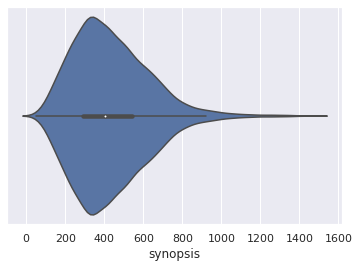

In [9]:
print("Min sinopsis length:", data['synopsis'].str.len().min())
print("Max sinopsis length:", data['synopsis'].str.len().max())
sns.violinplot(data['synopsis'].str.len());

So most of synopses have 200-600 symbols and longest is as much as 1469 symbols long! Let's see what it looks like.

In [14]:
longest_synopsis_id = data['synopsis'].str.len().argmax()
print(data.loc[longest_synopsis_id, 'title_ru'], '/', data.loc[longest_synopsis_id, 'title_orig'])
print('\n')
print(data.loc[longest_synopsis_id, 'synopsis'])

Гарри Поттер и Принц-полукровка / Harry Potter and the Half-Blood Prince


Теперь не только мир волшебников, но и мир маглов ощущает на себе все возрастающую силу Волан-де-Морта, а Хогвартс уже никак не назовешь надежным убежищем, каким он был раньше. Гарри подозревает, что в самом замке затаилась некая опасность, но Дамблдор больше сосредоточен на том, чтобы подготовить его к финальной схватке, которая, как он знает, уже не за горами. Вместе они пытаются разгадать секрет бессмертия Волан-де-Морта, а для этого Дамблдор приглашает на должность преподавателя по зельеварению своего старинного друга и коллегу — профессора Горация Слизнорта, который обожает устраивать вечеринки для избранных и гордится своими обширными связями в высших кругах. Но этот бонвиван и не подозревает, что как раз от него Дамблдор надеется заполучить самую важную информацию о крестражах.Тем временем учеников атакуют самые разные враги, а подростковые эмоции хлещут через край. Гарри начинает понимать, что становится

Now, let's look at the distribution of kinopoisk scores.

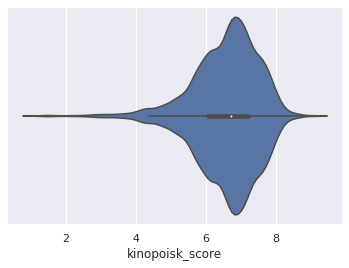

In [15]:
sns.violinplot(data['kinopoisk_score']);

So, most scores are between 5 and 8, let's compare it to IMDb scores distribution.

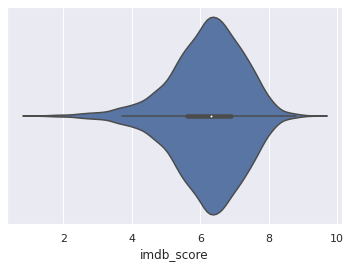

In [16]:
sns.violinplot(data['imdb_score']);

The distribution look smoother but pretty much alike the first one. Let's see how big is the correlation of scores from two different sites.

In [17]:
data['kinopoisk_score'].corr(data['imdb_score'])

0.8395873024592871

So we have a noticable positive correlation as one could expect, but it's not too strong.

Finally let's remove line terminators from synopses and save them all in a separate file for GPT-2 fitting.

In [8]:
data['synopsis'] = data['synopsis'].str.replace('\n', ' ').str.replace('\r', ' ')
data['synopsis'].to_csv(PATH_TO_DATA / "gpt2_dataset.txt", index=False, header=None, sep='@')